In [1]:
# import necessary tools & packages
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import pylab as pl

import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
# array dimension on original data
print(df_data.shape)

(194673, 38)


In [4]:
# dropping irrelavent columns 
df = df_data.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','SEVERITYCODE.1'], axis=1)

In [5]:
# array dimension after dropping columns
print(df.shape)

(194673, 16)


In [6]:
# new dataframe
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/13 14:54,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/06 18:55,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/04 10:20,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/13 9:26,NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/04 8:04,NaN,0,Raining,Wet,Daylight,NaN


In [7]:
# Getting information on the total number of each type of collision/accident
SEVCOD1 = df[df['SEVERITYCODE']==1].count()['SEVERITYCODE']
print('Number of collisions with property damage: ', SEVCOD1)

SEVCOD2 = df[df['SEVERITYCODE']==2].count()['SEVERITYCODE']
print('Number of collisions with injury: ', SEVCOD2)

SEVCOD3 = df[df['SEVERITYCODE']==3].count()['SEVERITYCODE']
print('Number of collisions with fatality: ', SEVCOD3)

Number of collisions with property damage:  136485
Number of collisions with injury:  58188
Number of collisions with fatality:  0


In [8]:
# Getting informaiton on the different causes/conditions of collision/accident
SPEEDING = df[df['SPEEDING']=='Y'].count()['SPEEDING']
print('Number of collisions where the driver was speeding: ', SPEEDING)

LIGHT = df[df['LIGHTCOND']=='Daylight'].count()['LIGHTCOND']
print('Number of collisions during the day: ', LIGHT)

DARK1 = df[df['LIGHTCOND']=='Dark - Street Lights On'].count()['LIGHTCOND']
print('Number of collisions during the night with street lights: ', DARK1)

DARK2 = df[df['LIGHTCOND']=='Dark - No Street Lights'].count()['LIGHTCOND']
print('Number of collisions during the night with no street lights: ', DARK2)

DARK = DARK1 + DARK2
print('Number of collisions during the night: ',DARK)

DUSK = df[df['LIGHTCOND']=='Dusk'].count()['LIGHTCOND']
print('Number of collisions during dusk: ', DUSK)

DAWN = df[df['LIGHTCOND']=='Dawn'].count()['LIGHTCOND']
print('Number of collisions during dawn: ', DAWN)

DRY = df[df['ROADCOND']=='Dry'].count()['ROADCOND']
print('Number of collisions where the road was dry: ', DRY)

WET = df[df['ROADCOND']=='Wet'].count()['ROADCOND']
print('Number of collisions where the road was wet: ', WET)

UI1 = df[df['UNDERINFL']=='1'].count()['UNDERINFL']
UIY = df[df['UNDERINFL']=='Y'].count()['UNDERINFL']
UI = UI1 + UIY
print('Number of collisions where the driver was under the influence: ', UI)

INATT = df[df['INATTENTIONIND']=='Y'].count()['INATTENTIONIND']
print('Number of collisions where the driver was not paying attention: ', INATT)

Number of collisions where the driver was speeding:  9333
Number of collisions during the day:  116137
Number of collisions during the night with street lights:  48507
Number of collisions during the night with no street lights:  1537
Number of collisions during the night:  50044
Number of collisions during dusk:  5902
Number of collisions during dawn:  2502
Number of collisions where the road was dry:  124510
Number of collisions where the road was wet:  47474
Number of collisions where the driver was under the influence:  9121
Number of collisions where the driver was not paying attention:  29805


In [9]:
# putting the Date and the Time of the collisions together for an easier view
df['Year'] = df['INCDTTM'].astype('datetime64[ns]')
Year = df['Year']
Year.head()

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
Name: Year, dtype: datetime64[ns]

In [10]:
# grouping different columns and rows to find trends
# visualization & data distributions with graphs

# Relationship between collision severity in regards to years from 2004 to the present day
Year_grp = df.groupby([df.Year.dt.year, 'SEVERITYCODE']).size().unstack(fill_value=0)
Year_grp.head()

SEVERITYCODE,1,2
Year,,
2004,8218,3647
2005,10665,4450
2006,10838,4350
2007,10439,4017
2008,9893,3767


In [11]:
# add '3' to combine "1" and "2" for a total count of collisions for that year
Year_grp[3]= Year_grp[1] + Year_grp[2]
Year_grp.head()

SEVERITYCODE,1,2,3
Year,,,
2004,8218,3647,11865
2005,10665,4450,15115
2006,10838,4350,15188
2007,10439,4017,14456
2008,9893,3767,13660


In [12]:
# Rename the columns for clarification
df1 = Year_grp.rename(columns={1:'PropDamage', 2:'Injury', 3:'Total'})
df1

SEVERITYCODE,PropDamage,Injury,Total
Year,,,
2004,8218,3647,11865
2005,10665,4450,15115
2006,10838,4350,15188
2007,10439,4017,14456
2008,9893,3767,13660
2009,8356,3378,11734
2010,7563,3245,10808
2011,7820,3099,10919
2012,7440,3467,10907


In [13]:
# check column names
df1.columns

Index(['PropDamage', 'Injury', 'Total'], dtype='object', name='SEVERITYCODE')

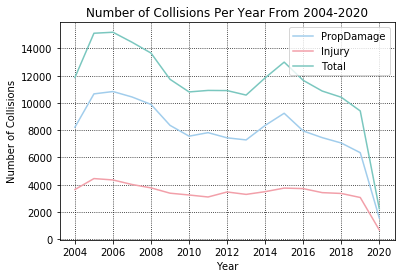

In [14]:
# graph the above table for better visualization
plt.plot(df1.PropDamage, color="#a1cdec")
plt.plot(df1.Injury, color='#f29fa9')
plt.plot(df1.Total, color='#7ac7bf')

plt.title("Number of Collisions Per Year From 2004-2020")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")

from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10
plt.grid(True, color='k', linestyle=":")

plt.legend();

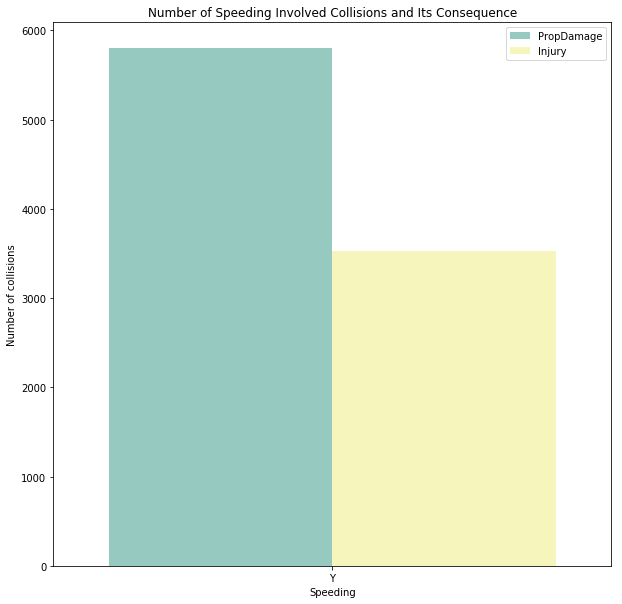

In [15]:
# explore the above graph and table in terms of each condition/potential cause
# speeding 
SPEEDING = df[df['SPEEDING']=='Y'].count()['SPEEDING']
df2 = sns.countplot(x='SPEEDING', hue='SEVERITYCODE', data=df, palette="Set3")

plt.title("Number of Speeding Involved Collisions and Its Consequence")
plt.xlabel("Speeding")
plt.ylabel("Number of collisions")

plt.legend(labels = ['PropDamage','Injury']);

In [16]:
dff = df.replace(to_replace=["0"], value='N')
dfff = dff.replace(to_replace=["1"], value='Y')

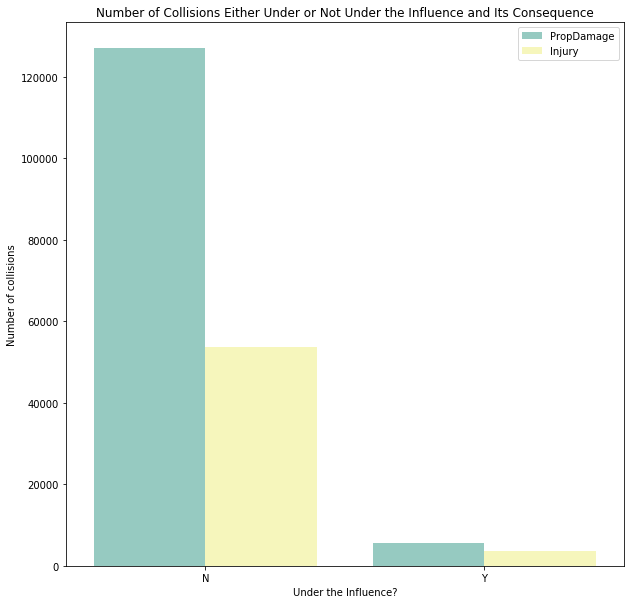

In [17]:
# Under the Influence
df4 = sns.countplot(x='UNDERINFL', hue='SEVERITYCODE', data=dfff, palette="Set3")

plt.title("Number of Collisions Either Under or Not Under the Influence and Its Consequence")
plt.xlabel("Under the Influence?")
plt.ylabel("Number of collisions")

plt.legend(labels = ['PropDamage','Injury']);

In [18]:
INATT = df.replace(to_replace=[np.nan], value='N')
INATT

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Year
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/13 14:54,N,N,Overcast,Wet,Daylight,N,2013-03-27 14:54:00
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/06 18:55,N,0,Raining,Wet,Dark - Street Lights On,N,2006-12-20 18:55:00
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/04 10:20,N,0,Overcast,Dry,Daylight,N,2004-11-18 10:20:00
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/13 9:26,N,N,Clear,Dry,Daylight,N,2013-03-29 09:26:00
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/04 8:04,N,0,Raining,Wet,Daylight,N,2004-01-28 08:04:00
5,1,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/19 17:42,N,N,Clear,Dry,Daylight,N,2019-04-20 17:42:00
6,1,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/08,N,0,Raining,Wet,Daylight,N,2008-12-09 00:00:00
7,2,Intersection,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/20 17:47,N,N,Clear,Dry,Daylight,N,2020-04-15 17:47:00
8,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/06 13:00,N,0,Clear,Dry,Daylight,N,2006-06-15 13:00:00
9,2,Intersection,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/06 15:49,N,0,Clear,Dry,Daylight,N,2006-03-20 15:49:00


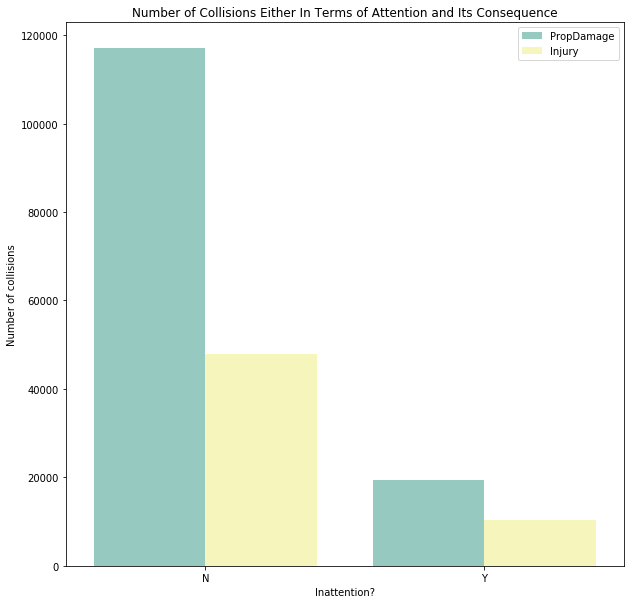

In [19]:
# Not Paying Attention?
df6 = sns.countplot(x='INATTENTIONIND', hue='SEVERITYCODE', data=INATT, palette="Set3")

plt.title("Number of Collisions Either In Terms of Attention and Its Consequence")
plt.xlabel("Inattention?")
plt.ylabel("Number of collisions")

plt.legend(labels = ['PropDamage','Injury']);

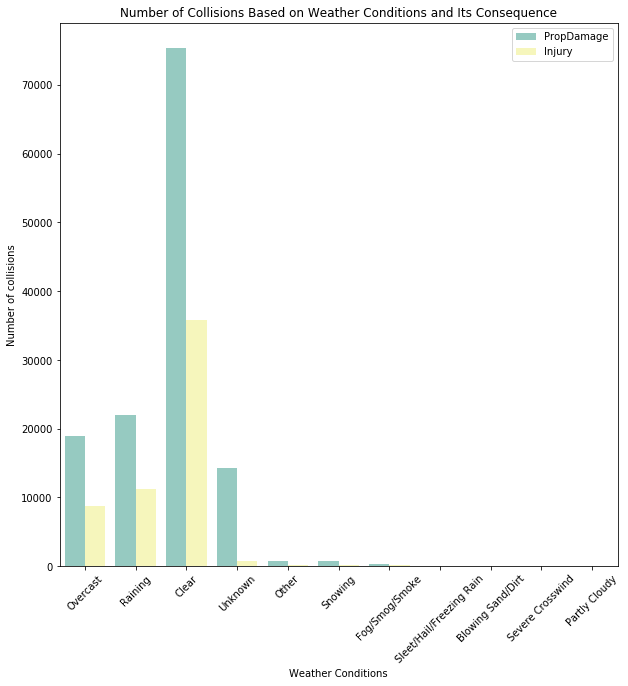

In [20]:
# weather conditions
df7 = sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df, palette="Set3")

plt.title("Number of Collisions Based on Weather Conditions and Its Consequence")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of collisions")

plt.xticks(rotation=45)

plt.legend(labels = ['PropDamage','Injury']);

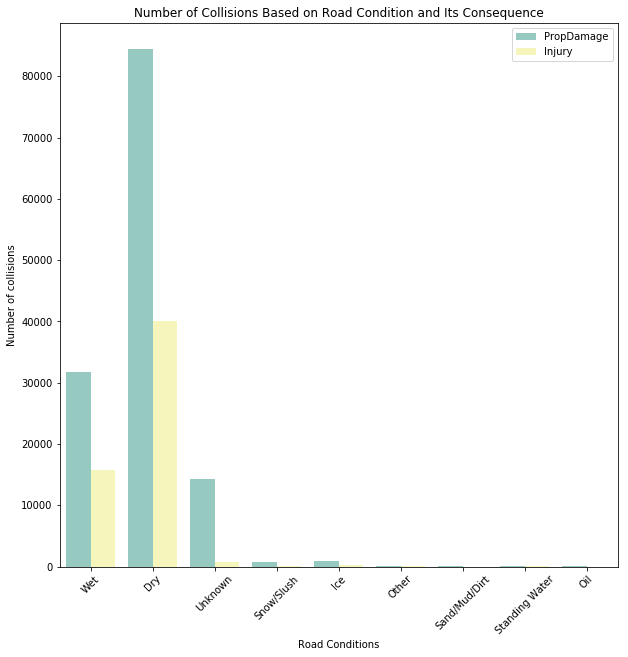

In [47]:
# road conditions
df8 = sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df, palette="Set3")

plt.title("Number of Collisions Based on Road Condition and Its Consequence")
plt.xlabel("Road Conditions")
plt.ylabel("Number of collisions")

plt.xticks(rotation=45)

plt.legend(labels = ['PropDamage','Injury']);

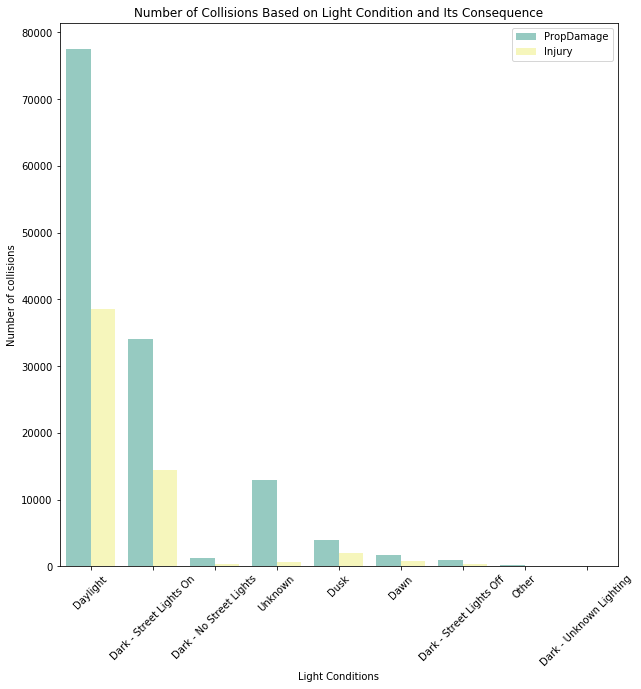

In [48]:
# Light Conditions
df9 = sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df, palette="Set3")

plt.title("Number of Collisions Based on Light Condition and Its Consequence")
plt.xlabel("Light Conditions")
plt.ylabel("Number of collisions")

plt.xticks(rotation=45)

plt.legend(labels = ['PropDamage','Injury']);

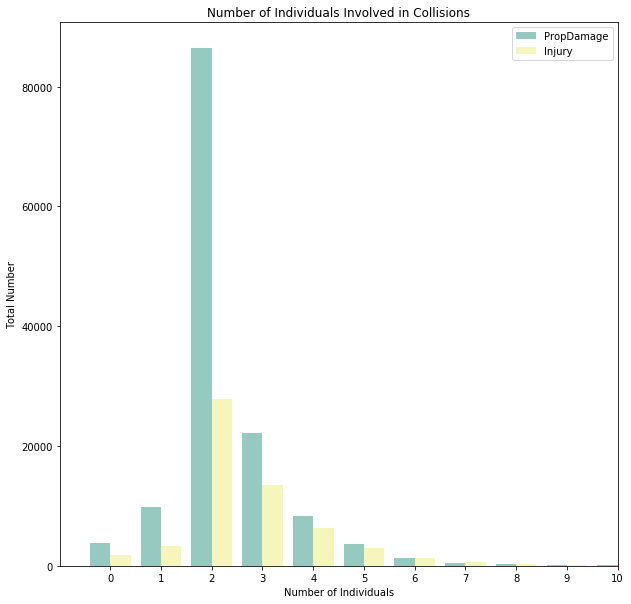

In [56]:
# what about the people involved?
df9 = sns.countplot(x='PERSONCOUNT', hue='SEVERITYCODE', data=df, palette="Set3")
df9.set(xlim = (-1,10))

plt.title("Number of Individuals Involved in Collisions")
plt.xlabel("Number of Individuals")
plt.ylabel("Total Number")

plt.legend(labels = ['PropDamage','Injury']);

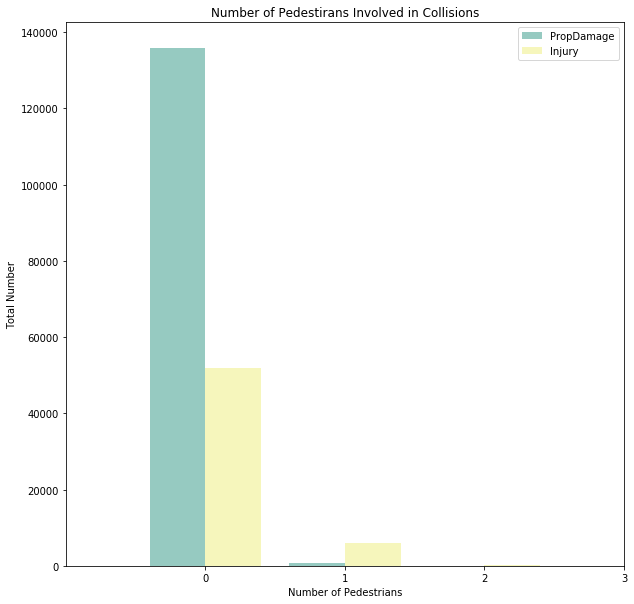

In [66]:
# what about the pedistrians involved?
df10 = sns.countplot(x='PEDCOUNT', hue='SEVERITYCODE', data=df, palette="Set3")
df10.set(xlim = (-1,3))

plt.title("Number of Pedestirans Involved in Collisions")
plt.xlabel("Number of Pedestrians")
plt.ylabel("Total Number")

plt.legend(labels = ['PropDamage','Injury']);

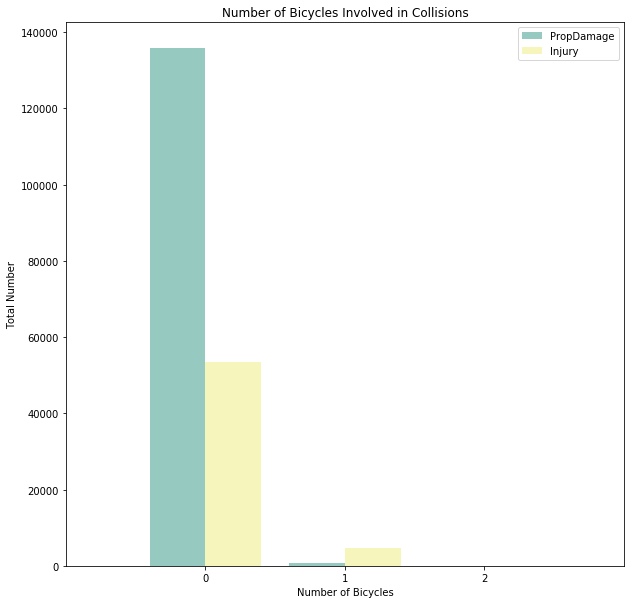

In [67]:
# what about the bicycles involved?
df11 = sns.countplot(x='PEDCYLCOUNT', hue='SEVERITYCODE', data=df, palette="Set3")
df11.set(xlim = (-1,3))

plt.title("Number of Bicycles Involved in Collisions")
plt.xlabel("Number of Bicycles")
plt.ylabel("Total Number")

plt.legend(labels = ['PropDamage','Injury']);

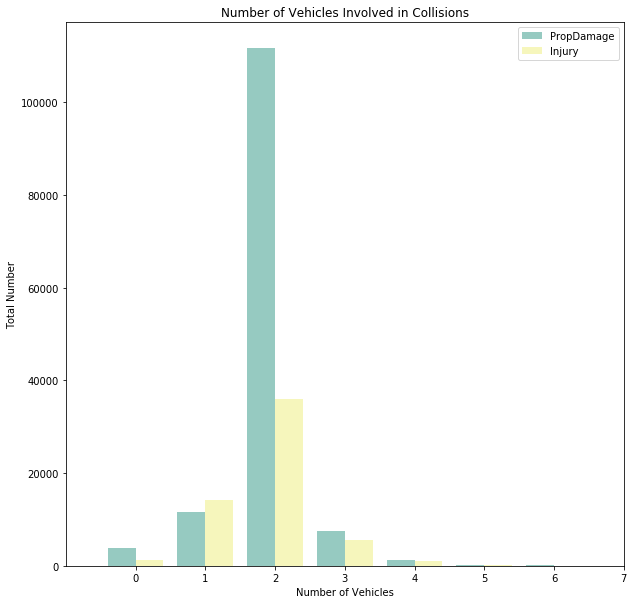

In [68]:
# what about the number of vehicles involved?
df12 = sns.countplot(x='VEHCOUNT', hue='SEVERITYCODE', data=df, palette="Set3")
df12.set(xlim = (-1,7))

plt.title("Number of Vehicles Involved in Collisions")
plt.xlabel("Number of Vehicles")
plt.ylabel("Total Number")

plt.legend(labels = ['PropDamage','Injury']);

In [69]:
# LOGISTIC REGRESSION

# pre-processing and selection 
Variables = ['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']
X = df[Variables]
y = df.SEVERITYCODE

In [70]:
# Train Test Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
# Model Development
logreg = LogisticRegression()

# For the model with data
logreg.fit(X_train, y_train)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train set: (136271, 4) (136271,)
Test set: (58402, 4) (58402,)


In [72]:
# Prediction
y_pred = logreg.predict(X_test)

In [73]:
# Model Evaluation using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[40094,   763],
       [13832,  3713]])

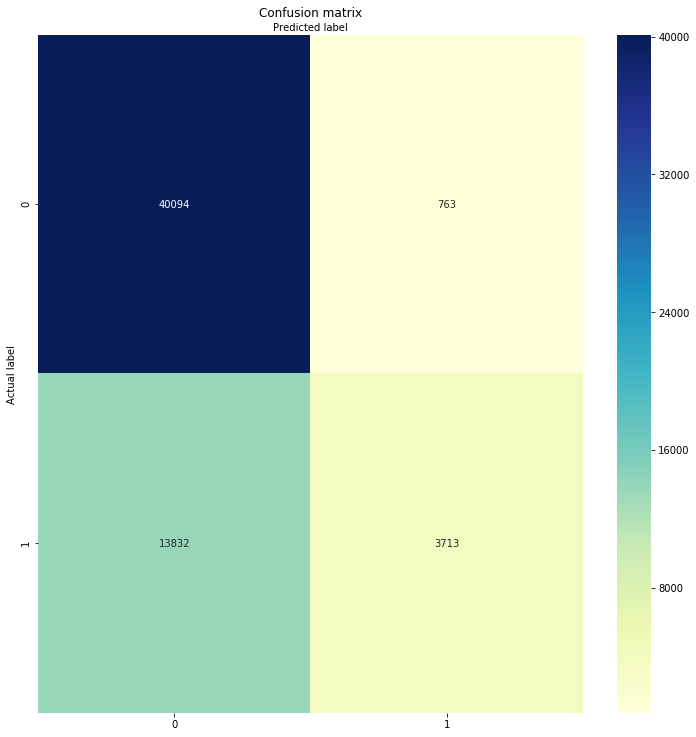

In [74]:
# Visualization of the confusion matrix
SEV_names = [1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(SEV_names))
plt.xticks(tick_marks, SEV_names)
plt.yticks(tick_marks, SEV_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [75]:
# Confusion Matrix Evaluation
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7500941748570255
